In [39]:
import os
import sys
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
#sys.path.insert(1, r'C:\Users\smartin5\Repos\myNeurochat')
sys.path.insert(1, r'C:\Users\maolivei\neuro_sean\NeuroChaT')
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
from neurochat.nc_data import NData
from neurochat.nc_spike import NSpike
from neurochat.nc_spatial import NSpatial
import neurochat.nc_plot as nc_plot

In [6]:
spike = NSpike(system="Axona")
spike.set_name("CO")
spat = NSpatial(system="Axona")
spat.set_name("S0")

data_dir = r"C:\Users\maolivei\Documents\post_doc\data\LCA1"
spike_name = "040319C_LCA1_open-arena_15min.2"
pos_name = "040319C_LCA1_open-arena_15min_1.txt"
spike.set_filename(os.path.join(data_dir, spike_name))
spat.set_filename(os.path.join(data_dir, pos_name))

In [15]:
spike.load()
spat.load()
spike.set_unit_no(3)

ndata = NData()
ndata.spike = spike
ndata.spatial = spat

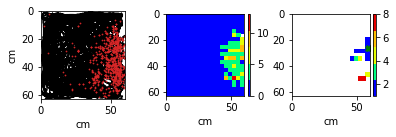

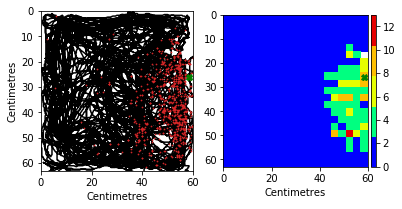

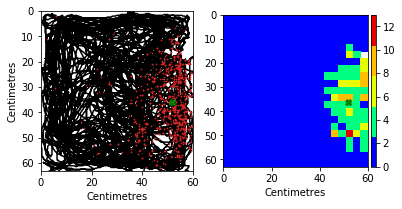

In [21]:
# Calculate place related statistics
pixel_size = 3
placeData = ndata.place(pixel=pixel_size, filter=[None, 3], range=[0, spat.get_duration()], chop_bound=0, fieldThresh=0.2, minPlaceFieldNeighbours=0, smoothPlace=False)
fig = nc_plot.loc_firing_and_place(placeData)

# Comparing different methods of obtaining the place field centroid
fig = nc_plot.loc_place_centroid(placeData, placeData['centroid'])
fig = nc_plot.loc_place_centroid(placeData, ndata.place_field_centroid_zscore(update=False, z_threshold=1))

In [22]:
# Test the angle calculation
import numpy as np
from neurochat.nc_utils import angle_between_points
a = np.array([1, 1.001])
b = np.array([1, 1])
c = np.array([1, 0])
print(angle_between_points(a, b, c))

180.0


In [23]:
print(ndata._results)

OrderedDict([('Spatial Skaggs', 1.7318429007195306), ('Spatial Sparsity', 0.23768725391298093), ('Spatial Coherence', 1.0), ('Place field Centroid x', 58.53343698650667), ('Place field Centroid y', 25.877581923885153)])


In [34]:
def add_axes_to_fig(axes, new_axes, fig):
    for ax, new_ax in zip(axes, new_axes):
        ax.remove()
        ax.figure = fig
        fig.add_axes(ax)
        ax.set_position(new_ax.get_position())
        new_ax.remove()

In [42]:
# Creates a grid of rows * cols figures, with the last column subdivided into a grid of four
def create_grid(rows, cols=3, size_multiplier=4, wspace=0.5, hspace=0.5):
    fig = plt.figure(
        figsize=(cols * size_multiplier, rows * size_multiplier), 
        tight_layout=True)
    gs = gridspec.GridSpec(2 * rows, 2 * cols, wspace=wspace, hspace=hspace)
    for i in range(rows):
        for j in range(cols-1):
            # Can also access the axes for plotting by calling fig.axes
            ax = fig.add_subplot(gs[2*i:2*(i+1), 2*j:2*(j+1)])
            
            #ax.plot(range(10))
        # Add a sub-four
        ax1 = fig.add_subplot(gs[2*i, 2*(cols-1)])
        ax1.plot(range(20))
        ax2 = fig.add_subplot(gs[2*i, 2*cols - 1])
        ax3 = fig.add_subplot(gs[2*i+1, 2*(cols-1)])
        ax4 = fig.add_subplot(gs[2*i+1, 2*cols - 1])
    return fig

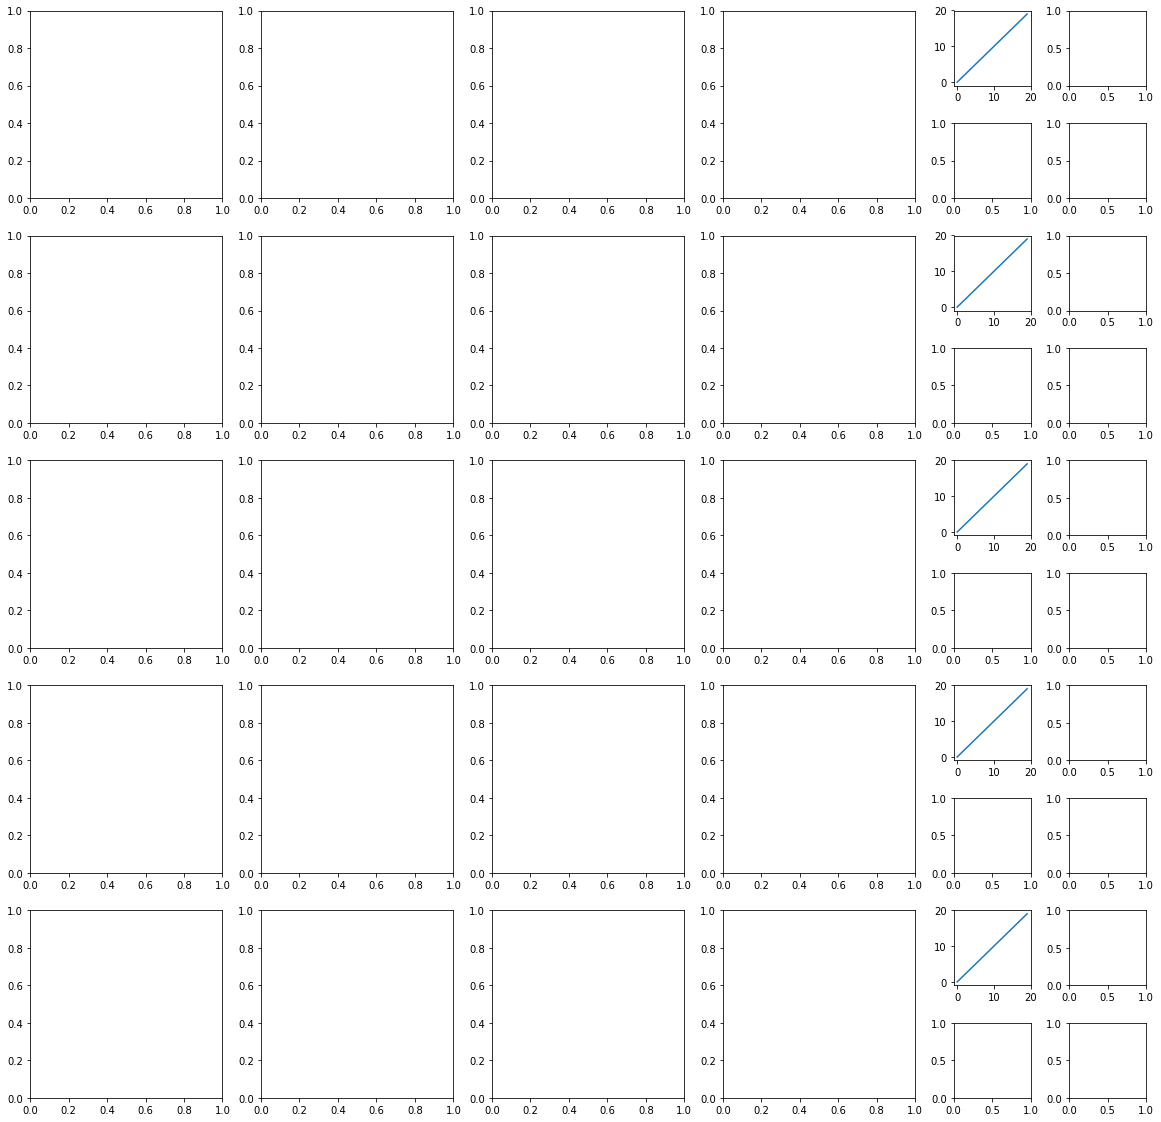

In [43]:
figure = create_grid(5, 5)

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

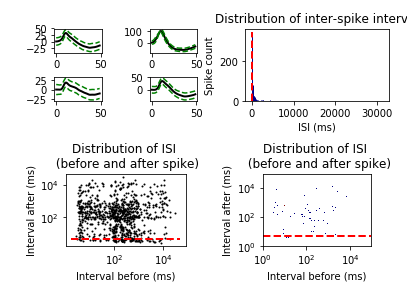

In [37]:
# Option number 1 to reuse figures
import matplotlib.gridspec as gridspec

wave_fig = nc_plot.wave_property(ndata.wave_property())
isi_fig = nc_plot.isi(ndata.isi())
size = (5, 4)

gs = gridspec.GridSpec(*size, wspace=1, hspace=1)
fig1 = plt.figure(figsize=(16, 16))

wave_ax1 = fig1.add_subplot(gs[0, 0])
wave_ax2 = fig1.add_subplot(gs[0, 1])
wave_ax3 = fig1.add_subplot(gs[1, 0])
wave_ax4 = fig1.add_subplot(gs[1, 1])
wave_axes = [wave_ax1, wave_ax2, wave_ax3, wave_ax4]

add_axes_to_fig(wave_fig.axes, wave_axes, fig1)
plt.close(wave_fig)

isi_ax1 = fig1.add_subplot(gs[0:2, 2:])
isi_ax2 = fig1.add_subplot(gs[3:, 0:2])
isi_ax3 = fig1.add_subplot(gs[3:, 2:])
isi_axes = [isi_ax1, isi_ax2, isi_ax3]

isi_fig_axes = [figure.axes[0] for figure in isi_fig]
add_axes_to_fig(isi_fig_axes, isi_axes, fig1)

In [38]:
# Option 2 to reuse figures
import matplotlib.pyplot as plt
from svgutils.compose import Figure
wave_fig = nc_plot.wave_property(ndata.wave_property())
plt.savefig("wave.svg")
isi_fig = nc_plot.isi(ndata.isi())
plt.savefig("isi.svg")
#Make a composed Figure

ModuleNotFoundError: No module named 'svgutils'